<a href="https://colab.research.google.com/github/heyitzrizki/final-project-ds49-group3/blob/main/eda%20%26%20preprocessing/eda_%26_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Connect to GitHub

## 0.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats
from scipy.stats import norm, chi2_contingency
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import sklearn

import pprint

warnings.filterwarnings("ignore")
%matplotlib inline
from datetime import datetime
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(20,15)})

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 0.2 Load Dataset

In [2]:
url = 'https://raw.githubusercontent.com/heyitzrizki/final-project-ds49-group3/refs/heads/main/data/dataset.csv'
df = pd.read_csv(url)
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [4]:
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['created_at'] = pd.to_datetime(df['created_at'])
df['market_id'] = df['market_id'].astype('object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  object        
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    192668 non-null  object        
 5   order_protocol            196433 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    181166 non-null  float64       
 12  to

# 1. Exploratory Data Analysis

## 1.1 Check Null Values

In [6]:
df.isnull().sum()

,0
market_id,987
created_at,0
actual_delivery_time,7
store_id,0
store_primary_category,4760
order_protocol,995
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


## 1.2 Check Duplicate Data

In [7]:
df_duplicate = df.copy()

In [8]:
df.duplicated().sum()

np.int64(0)

## 1.3 Check Unique Values

### 1.3.1 Check Data Shape

In [9]:
df.shape

(197428, 14)

### 1.3.2 Check Data Type

In [10]:
df.dtypes

,0
market_id,object
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
store_id,object
store_primary_category,object
order_protocol,float64
total_items,int64
subtotal,int64
num_distinct_items,int64
min_item_price,int64


### 1.3.3 Check Data Stats

In [11]:
df.describe()

,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,197428,197421,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2015-02-04 22:00:09.537962752,2015-02-04 22:48:23.348914432,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
min,2014-10-19 05:24:15,2015-01-21 15:58:11,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2015-01-29 02:32:42,2015-01-29 03:22:29,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,2015-02-05 03:29:09.500000,2015-02-05 04:40:41,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,2015-02-12 01:39:18.500000,2015-02-12 02:25:26,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,2015-02-18 06:00:44,2015-02-19 22:45:31,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000
std,NaN,NaN,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830


## 1.4 Explore & Clean Numerical Features

In [12]:
# Select columns only numerical data

df_duplicate_num = df_duplicate.select_dtypes(exclude=["object", "datetime"])
df_duplicate_num.head()

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [13]:
# Define a threshold for quasi-constant features (e.g., 95% similar values)
quasi_constant_threshold = 0.01

# Initialize the VarianceThreshold selector
selector = VarianceThreshold(
    threshold=quasi_constant_threshold
)

# Fit the selector to the numerical features (excluding the target variable 'SalePrice')
selector.fit(df_duplicate_num.iloc[:, :-1])

# Get the indices of features that are not quasi-constant
# These are the features we want to keep.
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features:
selected_feature_names = (
    df_duplicate_num
    .columns[selected_feature_indices]
    .tolist()
)

print(f"Selected features:")
pprint.pprint(selected_feature_names)

Selected features:
['order_protocol',
 'total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_partners',
 'total_busy_partners']


In [14]:
selected_feature_indices

array([0, 1, 2, 3, 4, 5, 6, 7])

In [15]:
# Get the number of features that are not constant
print(f"Number of retained features:")
print(len(selected_feature_indices))
print("\n")
print(f"Number of quasi_constant features:")
print(len(df_duplicate_num.iloc[:, :-1].columns) - len(selected_feature_indices))

Number of retained features:
8


Number of quasi_constant features:
0


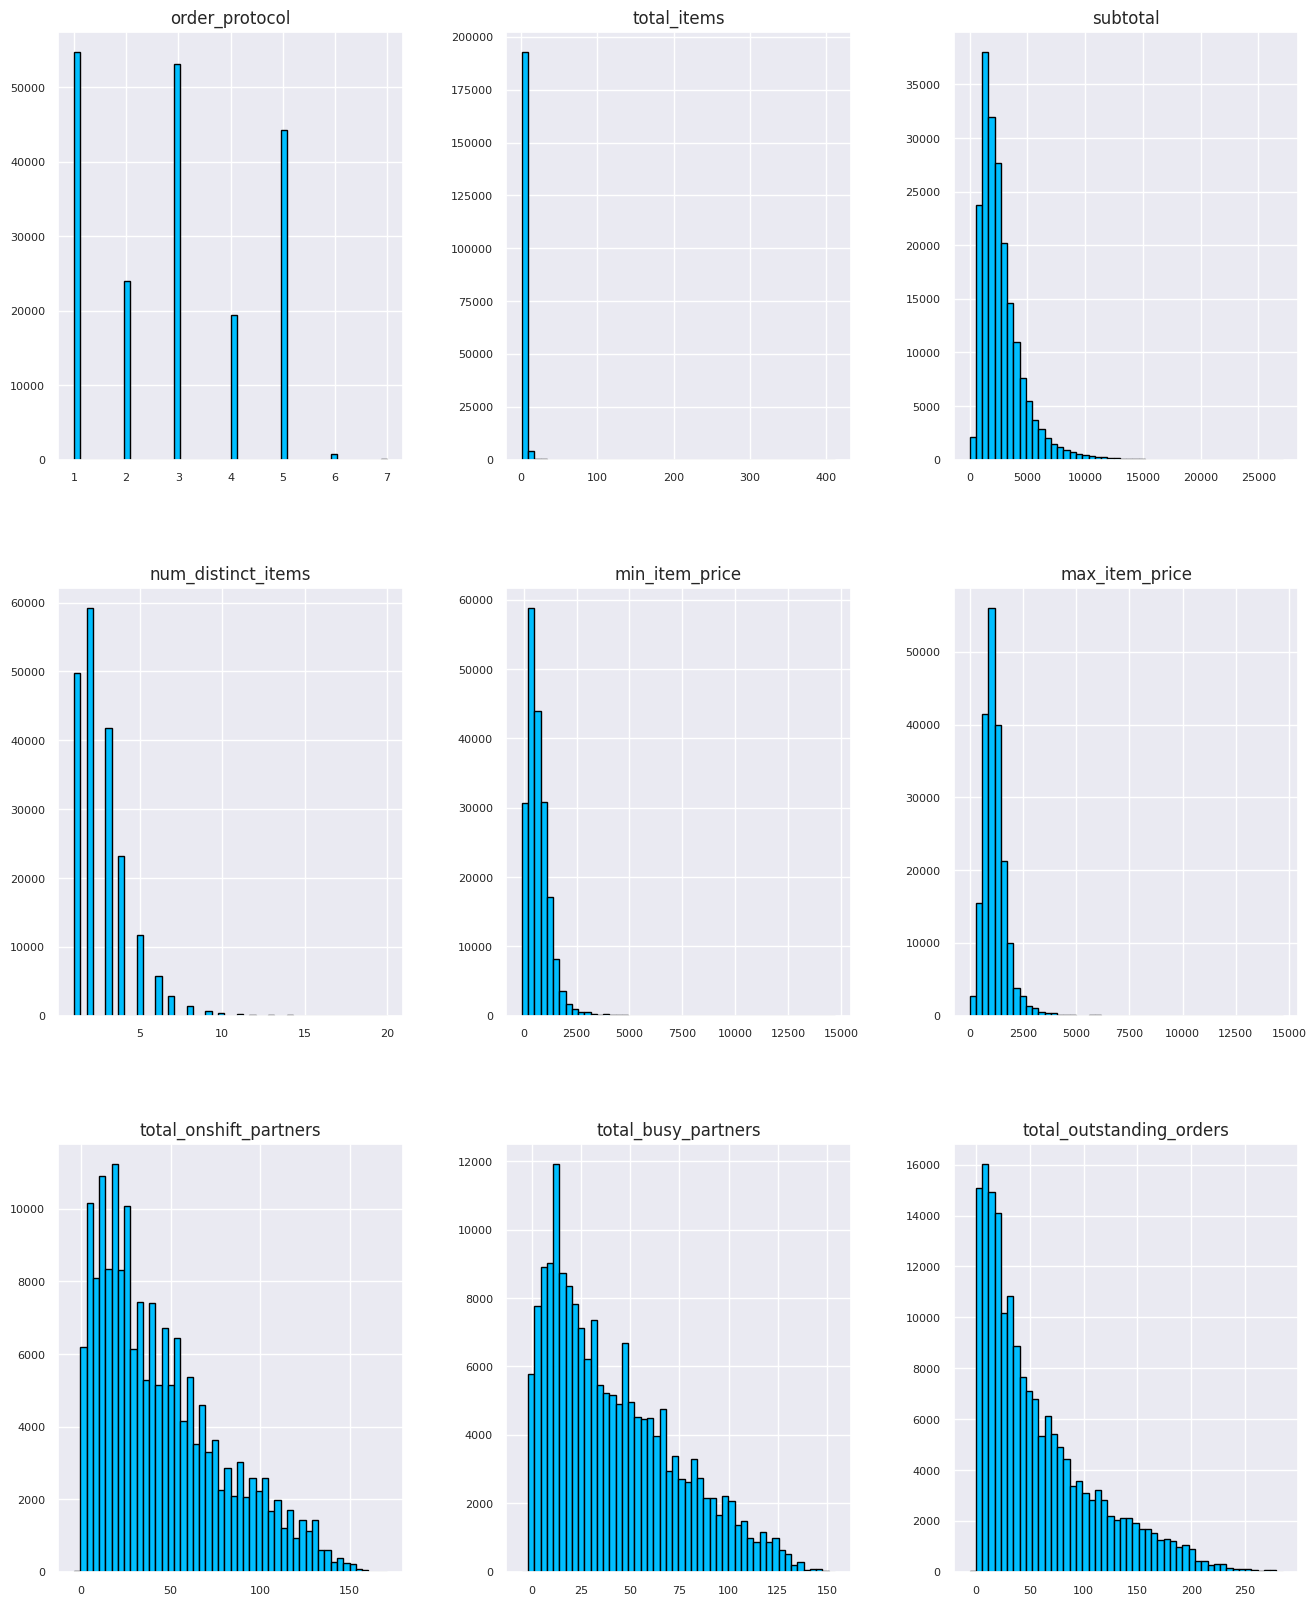

In [16]:
# Plot the distribution of all the numerical data
fig_ = df_duplicate_num.hist(
    figsize=(16, 20),
    bins=50,
    color="deepskyblue",
    edgecolor="black",
    xlabelsize=8,
    ylabelsize=8
)

### 1.4.1 Correlation Heatmap

Heatmap for all the remaining numerical data including the target 'Total Outstanding Orders'

In [17]:
# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

In [18]:
# Define correlation matrix
corr_matrix = df_duplicate_num.corr()
corr_matrix

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
order_protocol,1.00,0.01,-0.05,-0.02,-0.05,-0.09,0.15,0.15,0.13
total_items,0.01,1.00,0.56,0.76,-0.39,-0.06,0.03,0.03,0.03
subtotal,-0.05,0.56,1.00,0.68,0.04,0.51,0.13,0.13,0.13
num_distinct_items,-0.02,0.76,0.68,1.00,-0.45,0.04,0.07,0.06,0.07
min_item_price,-0.05,-0.39,0.04,-0.45,1.00,0.55,0.04,0.04,0.04
max_item_price,-0.09,-0.06,0.51,0.04,0.55,1.00,0.13,0.13,0.13
total_onshift_partners,0.15,0.03,0.13,0.07,0.04,0.13,1.00,0.94,0.94
total_busy_partners,0.15,0.03,0.13,0.06,0.04,0.13,0.94,1.00,0.93
total_outstanding_orders,0.13,0.03,0.13,0.07,0.04,0.13,0.94,0.93,1.00


In [19]:
# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0
corr_matrix

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
order_protocol,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
total_items,0.00,1.00,0.56,0.76,-0.39,0.00,0.00,0.00,0.00
subtotal,0.00,0.56,1.00,0.68,0.00,0.51,0.00,0.00,0.00
num_distinct_items,0.00,0.76,0.68,1.00,-0.45,0.00,0.00,0.00,0.00
min_item_price,0.00,-0.39,0.00,-0.45,1.00,0.55,0.00,0.00,0.00
max_item_price,0.00,0.00,0.51,0.00,0.55,1.00,0.00,0.00,0.00
total_onshift_partners,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.94,0.94
total_busy_partners,0.00,0.00,0.00,0.00,0.00,0.00,0.94,1.00,0.93
total_outstanding_orders,0.00,0.00,0.00,0.00,0.00,0.00,0.94,0.93,1.00


In [20]:
# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

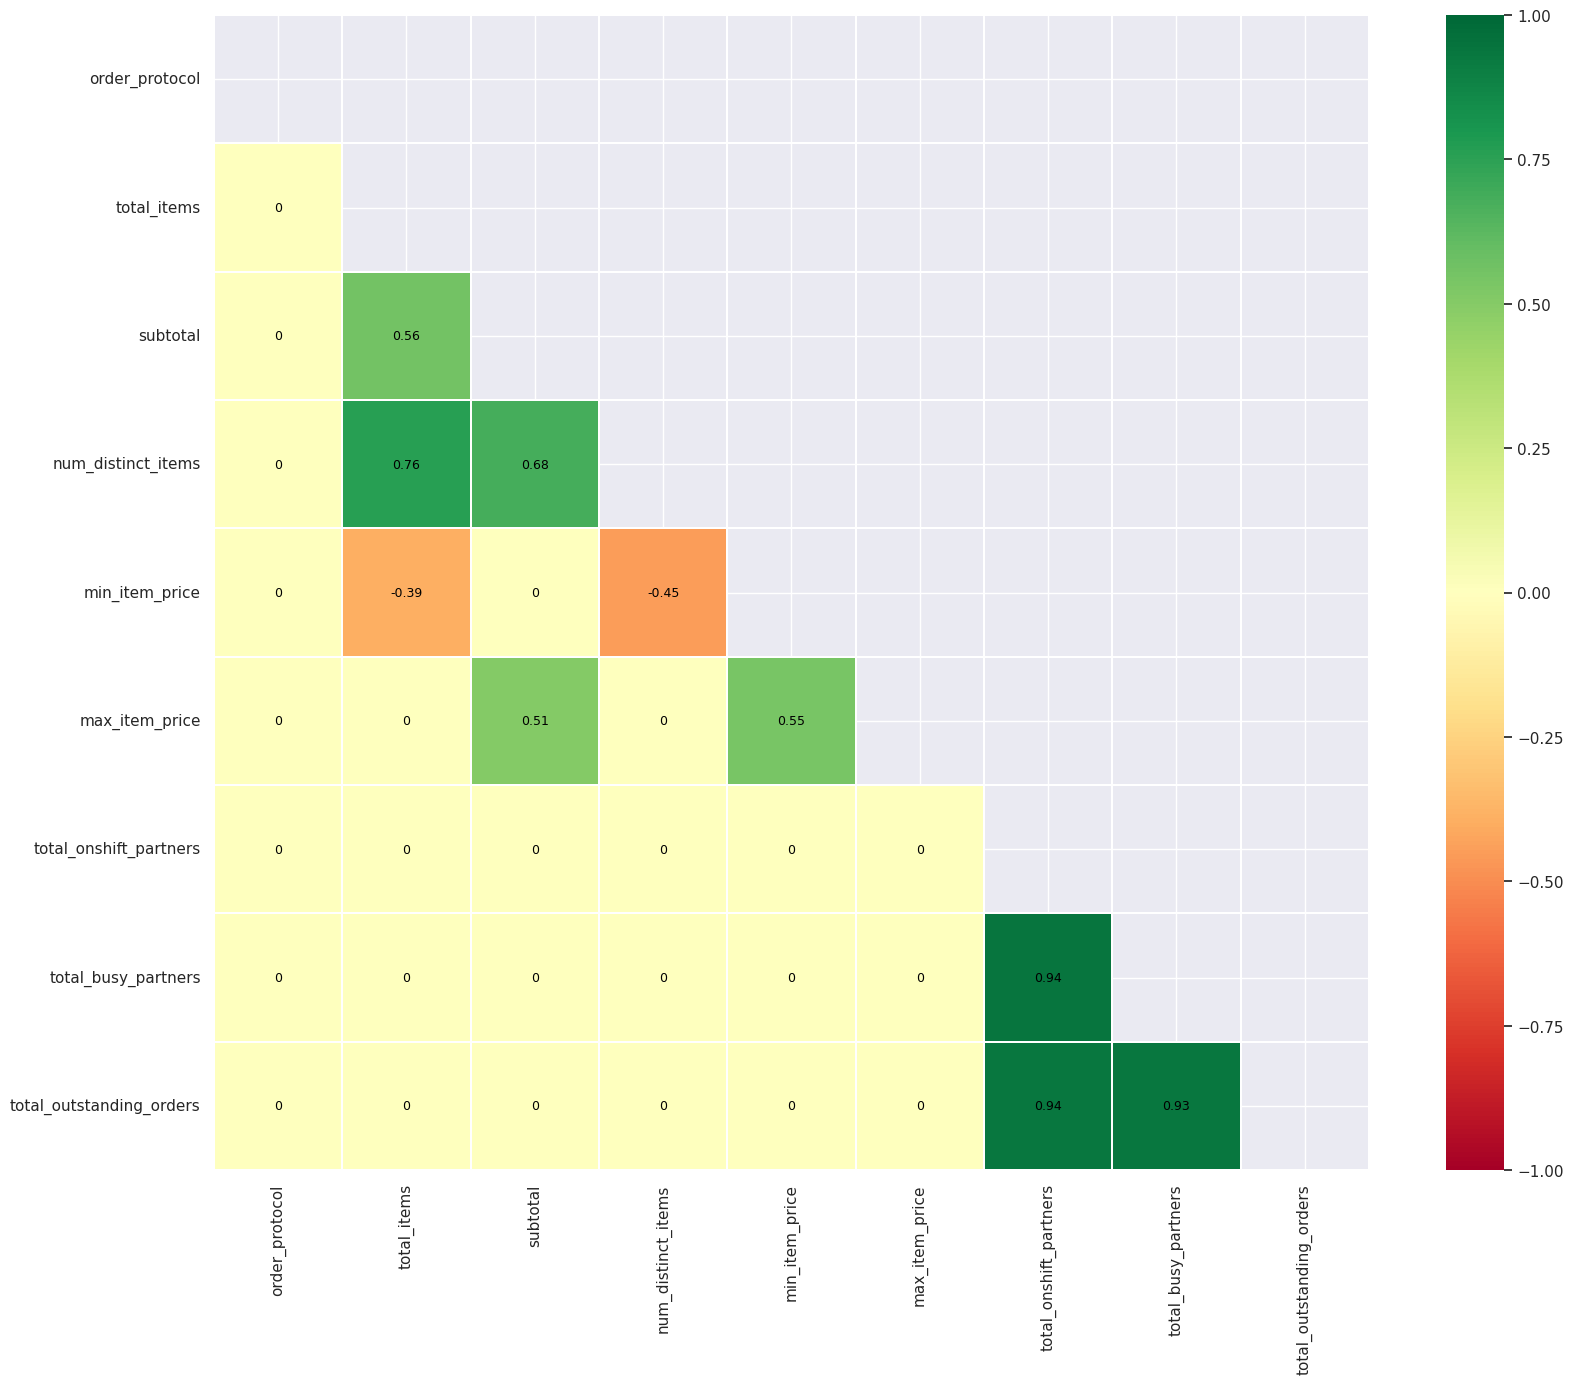

In [21]:
cmap = "RdYlGn"

# Plot the heatmap
sns.heatmap(
    data=corr_matrix,
    mask=mask, # cover, not showing them which masked True
    vmax=1.0,
    vmin=-1.0,
    linewidths=0.1,
    annot_kws={
        "size": 9,
        "color": "black"
    },
    square=True,
    cmap=cmap,
    annot=True
);

In [22]:
# Calculate correlation with 'Total_Outstanding_Orders' for numerical features
correlation_with_outstanding = df_duplicate_num.corr()["total_outstanding_orders"][:-1]

# Identify strongly correlated features (correlation coefficient >= 0.5)
strong_correlations = (
    correlation_with_outstanding[abs(correlation_with_outstanding) >= 0.5]
    .sort_values(ascending=False)
)
print(f"{len(strong_correlations)} strongly correlated features with total_outstanding_orders:")
print(strong_correlations)

print("\n-------------------------#######-------------------------\n")

# Identify moderately correlated features (0.3 <= correlation coefficient < 0.5)
moderate_correlations = (
    correlation_with_outstanding[(abs(correlation_with_outstanding) < 0.5) \
    & (abs(correlation_with_outstanding) >= 0.3)]
    .sort_values(ascending=False)
)
print(f"{len(moderate_correlations)} moderately correlated features with total_outstanding_orders:")
print(moderate_correlations)

2 strongly correlated features with total_outstanding_orders:
total_onshift_partners   0.94
total_busy_partners      0.93
Name: total_outstanding_orders, dtype: float64

-------------------------#######-------------------------

0 moderately correlated features with total_outstanding_orders:
Series([], Name: total_outstanding_orders, dtype: float64)


In [23]:
strong_correlations.index.tolist()

['total_onshift_partners', 'total_busy_partners']

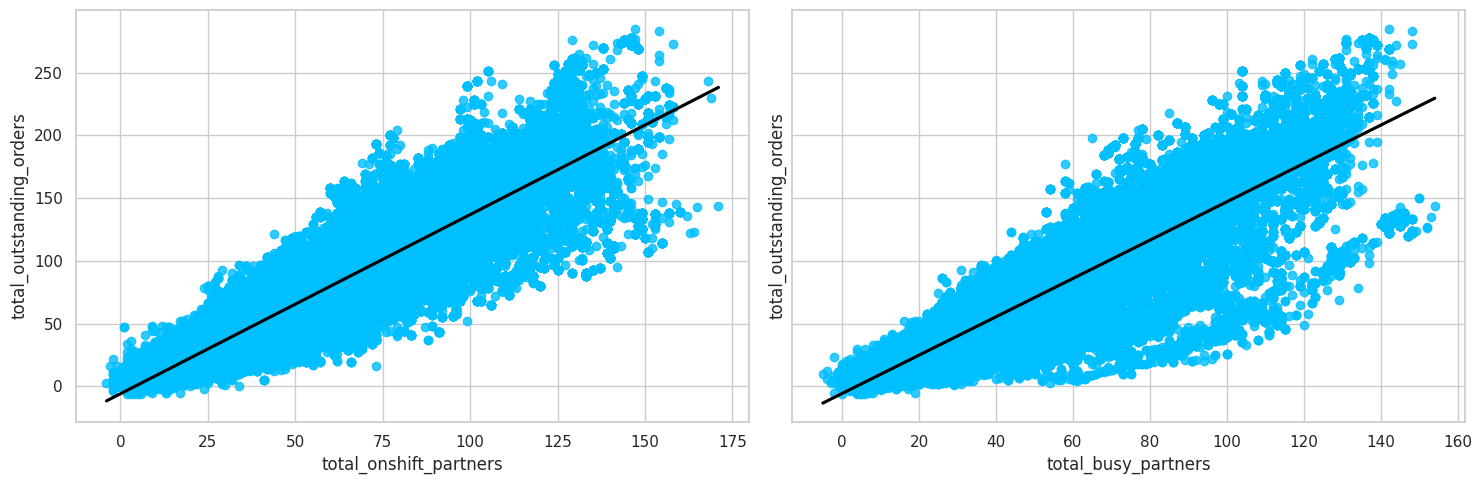

In [24]:
# Features with high correlation (higher than 0.5)
strong_features = strong_correlations.index.tolist()
strong_features.append("total_outstanding_orders")
df_strong_features = df_duplicate_num.loc[:, strong_features]

sns.set_style("whitegrid")  # define figures style

# Calculate the number of rows and columns for subplots
n_rows = (len(strong_features) -1 + 2) // 3  # Ensure enough rows
n_cols = min(3, len(strong_features) - 1)


fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(15, 5 * n_rows),
    sharey=True
)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i in range(len(strong_features) - 1):
    sns.regplot(
        x=strong_features[i],
        y="total_outstanding_orders",
        data=df_strong_features,
        ax=axes[i],
        scatter_kws={"color": "deepskyblue"},
        line_kws={"color": "black"},
    )
    axes[i].set_xlabel(strong_features[i]) # Set xlabel for each subplot


# Turn off any unused subplots
for i in range(len(strong_features) - 1, len(axes)):
    axes[i].set_axis_off()

plt.tight_layout()
plt.show()

### 1.4.2 Missing Data of Numerical Features

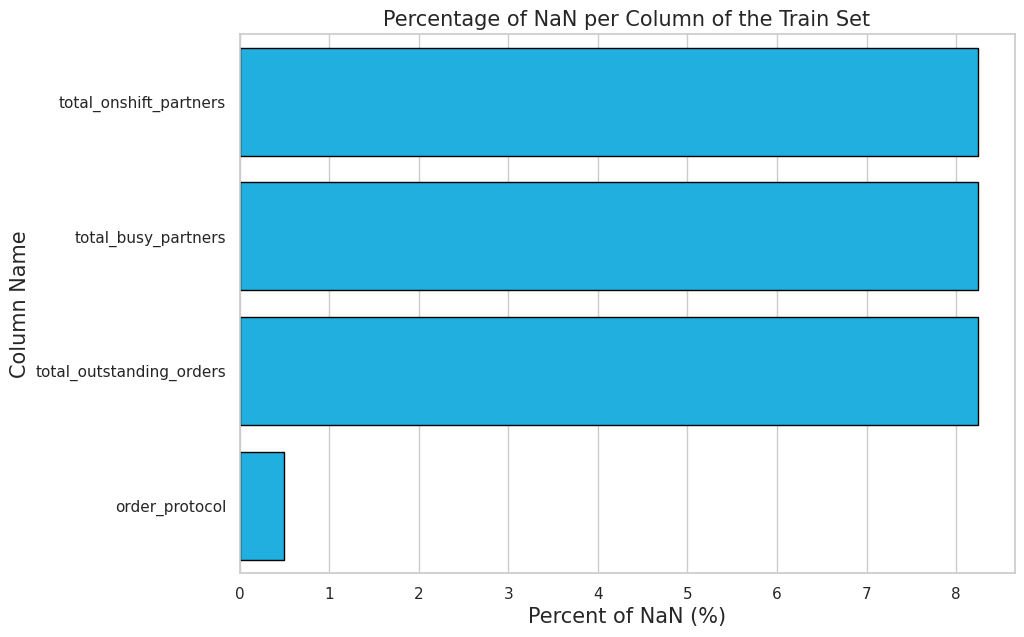

In [25]:
# Check the NaN of the train set by ploting percent of missing values per column
column_with_nan = df_duplicate_num.columns[df_duplicate_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    nan_percentage = round(df_duplicate_num[i].isnull().sum()*100/len(df_duplicate_num), 2)
    percent_nan.append(nan_percentage)

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(
    by=["Percent_NaN"],
    ascending=False,
    inplace=True
)

# Define figure parameters
sns.set(rc={"figure.figsize":(10, 7)})
sns.set_style("whitegrid")
fontsize=15

# Plot results
p = sns.barplot(
    x="Percent_NaN",
    y="Column",
    data=tab,
    edgecolor="black",
    color="deepskyblue"
)

p.set_title("Percentage of NaN per Column of the Train Set", fontsize=fontsize)
p.set_xlabel("Percent of NaN (%)", fontsize=fontsize)
p.set_ylabel("Column Name", fontsize=fontsize);

In [26]:
# Imputation of missing values (NaNs) with SimpleImputer
my_imputer = SimpleImputer(strategy="median")

df_duplicate_imputed = pd.DataFrame(
    my_imputer.fit_transform(df_duplicate_num)
)

df_duplicate_imputed.head()

,0,1,2,3,4,5,6,7,8
0,1.00,4.00,"3,441.00",4.00,557.00,"1,239.00",33.00,14.00,21.00
1,2.00,1.00,"1,900.00",1.00,"1,400.00","1,400.00",1.00,2.00,2.00
2,1.00,1.00,"1,900.00",1.00,"1,900.00","1,900.00",1.00,0.00,0.00
3,1.00,6.00,"6,900.00",5.00,600.00,"1,800.00",1.00,1.00,2.00
4,1.00,3.00,"3,900.00",3.00,"1,100.00","1,600.00",6.00,6.00,9.00


In [27]:
df_duplicate_imputed.columns = df_duplicate_num.columns
df_duplicate_imputed.head()

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.00,4.00,"3,441.00",4.00,557.00,"1,239.00",33.00,14.00,21.00
1,2.00,1.00,"1,900.00",1.00,"1,400.00","1,400.00",1.00,2.00,2.00
2,1.00,1.00,"1,900.00",1.00,"1,900.00","1,900.00",1.00,0.00,0.00
3,1.00,6.00,"6,900.00",5.00,600.00,"1,800.00",1.00,1.00,2.00
4,1.00,3.00,"3,900.00",3.00,"1,100.00","1,600.00",6.00,6.00,9.00


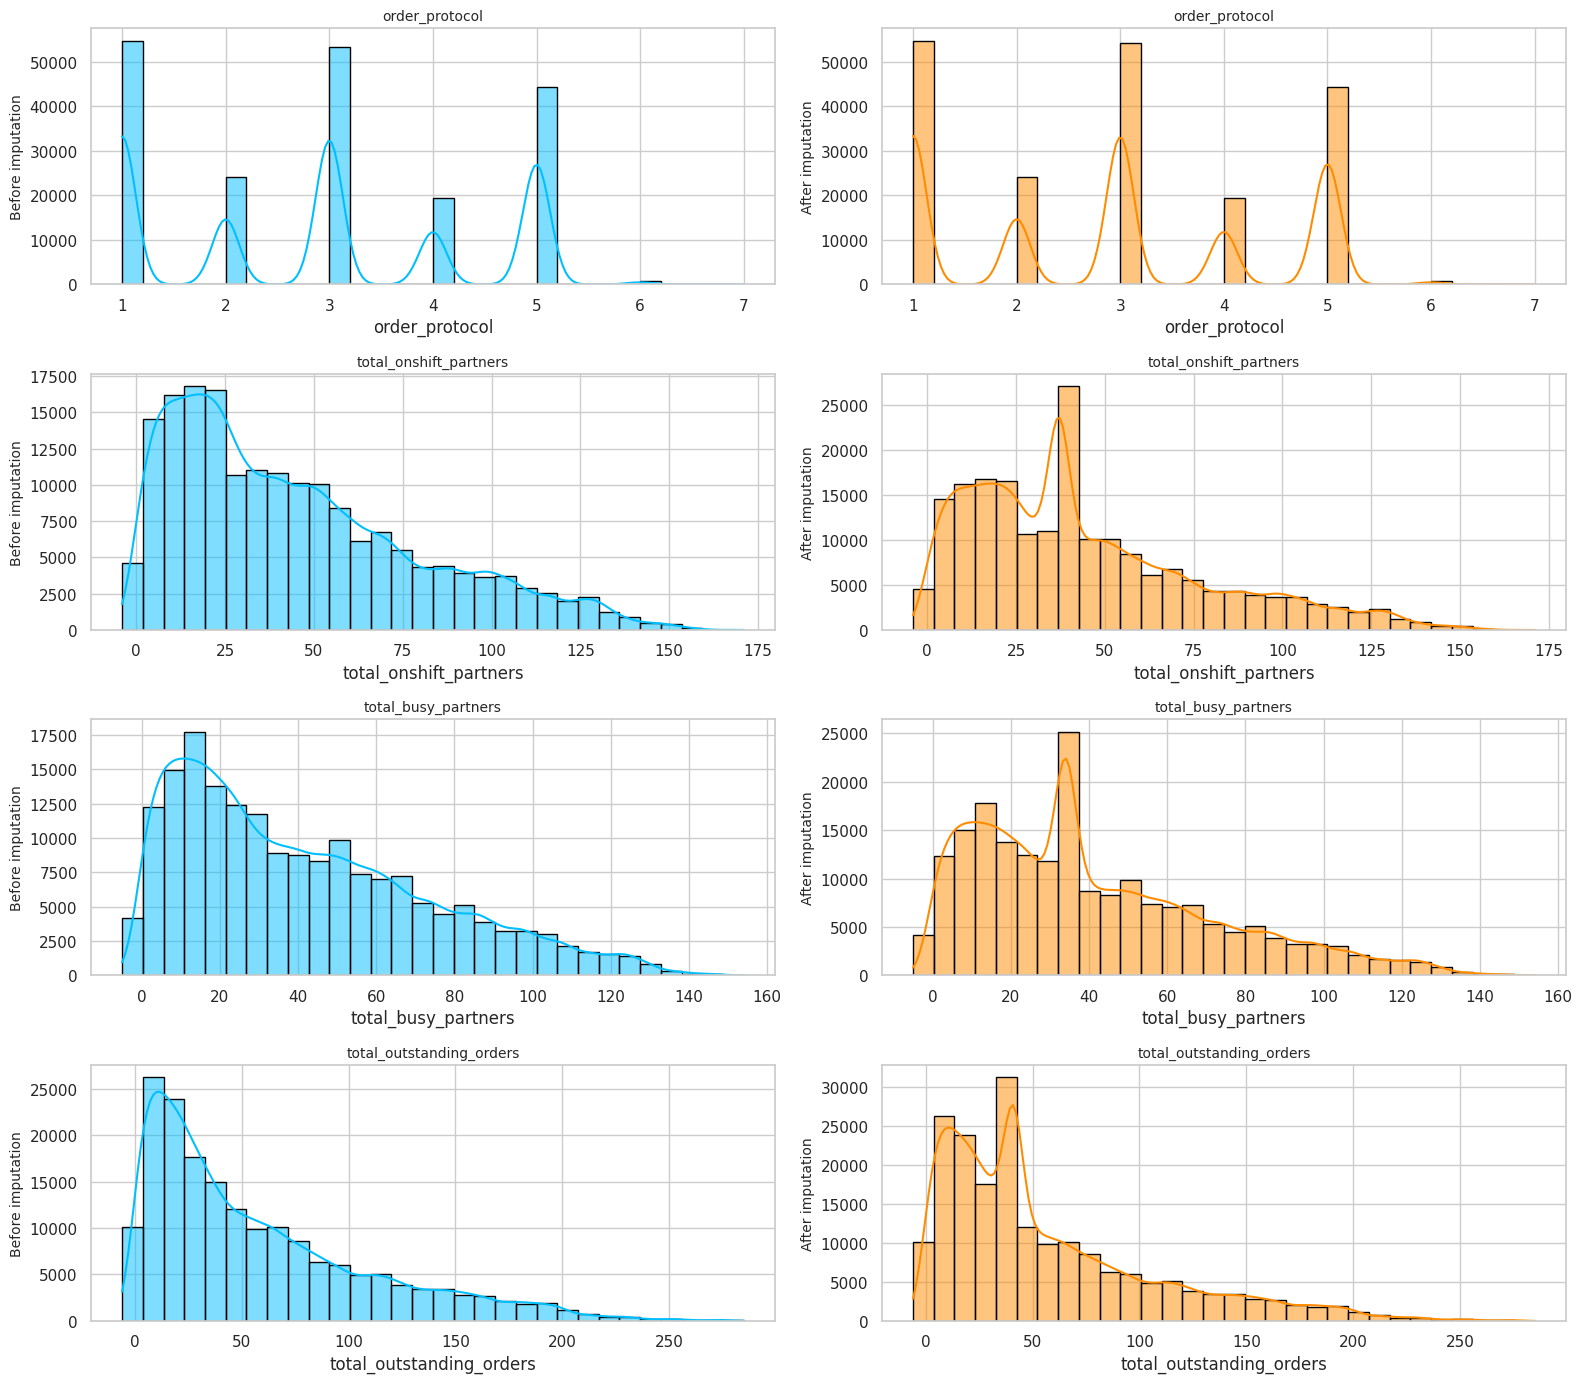

In [28]:
# Let's check the distribution of each imputed feature before and after imputation

# Define figure parameters
sns.set(rc={"figure.figsize": (16, 14 )})
sns.set_style("whitegrid")
fig, axes = plt.subplots(4, 2)
fontsize=10

# Features to plot
features = ["order_protocol", "total_onshift_partners", "total_busy_partners", "total_outstanding_orders"]

# Plot the results
for i, feature in enumerate(features):
    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(
        ax=axes[i, 0],
        x=df_duplicate_num[feature],
        kde=True,
        bins=30,
        color="deepskyblue",
        edgecolor="black"
    )
    p.set_ylabel(f"Before imputation", fontsize=fontsize)
    p.set_title(f"{feature}", fontsize=fontsize)

    # after imputation
    q = sns.histplot(
        ax=axes[i, 1],
        x=df_duplicate_imputed[feature],
        kde=True,
        bins=30,
        color="darkorange",
        edgecolor="black"
    )
    q.set_ylabel(f"After imputation", fontsize=fontsize)
    q.set_title(f"{feature}", fontsize=fontsize)

plt.tight_layout()
plt.show()

In [29]:
df_duplicate_imputed.drop(
    columns=["total_outstanding_orders", "total_busy_partners", "total_onshift_partners"],
    inplace=True
)

df_duplicate_imputed.head()

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price
0,1.00,4.00,"3,441.00",4.00,557.00,"1,239.00"
1,2.00,1.00,"1,900.00",1.00,"1,400.00","1,400.00"
2,1.00,1.00,"1,900.00",1.00,"1,900.00","1,900.00"
3,1.00,6.00,"6,900.00",5.00,600.00,"1,800.00"
4,1.00,3.00,"3,900.00",3.00,"1,100.00","1,600.00"


## 1.5 Explore & Clean Categorical Features

In [30]:
df_cat = df.copy()

In [31]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  object        
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    192668 non-null  object        
 5   order_protocol            196433 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    181166 non-null  float64       
 12  to

In [32]:
# Categorical to Quantitative relationship

categorical_features = []
for feat, feat_type in zip(df_cat.columns, df_cat.dtypes):
    if feat_type == 'object':
       categorical_features.append(feat)

# Include target variable
categorical_features.append("total_outstanding_orders")

df_cat_categ = df_cat[categorical_features]

In [33]:
display(df_cat_categ.head())

,market_id,store_id,store_primary_category,total_outstanding_orders
0,1.00,df263d996281d984952c07998dc54358,american,21.00
1,2.00,f0ade77b43923b38237db569b016ba25,mexican,2.00
2,3.00,f0ade77b43923b38237db569b016ba25,NaN,0.00
3,3.00,f0ade77b43923b38237db569b016ba25,NaN,2.00
4,3.00,f0ade77b43923b38237db569b016ba25,NaN,9.00


In [34]:
df_cat_categ.drop(
    columns=["market_id", "store_id"],
    inplace=True
)

In [35]:
display(df_cat_categ.head())

,store_primary_category,total_outstanding_orders
0,american,21.00
1,mexican,2.00
2,NaN,0.00
3,NaN,2.00
4,NaN,9.00


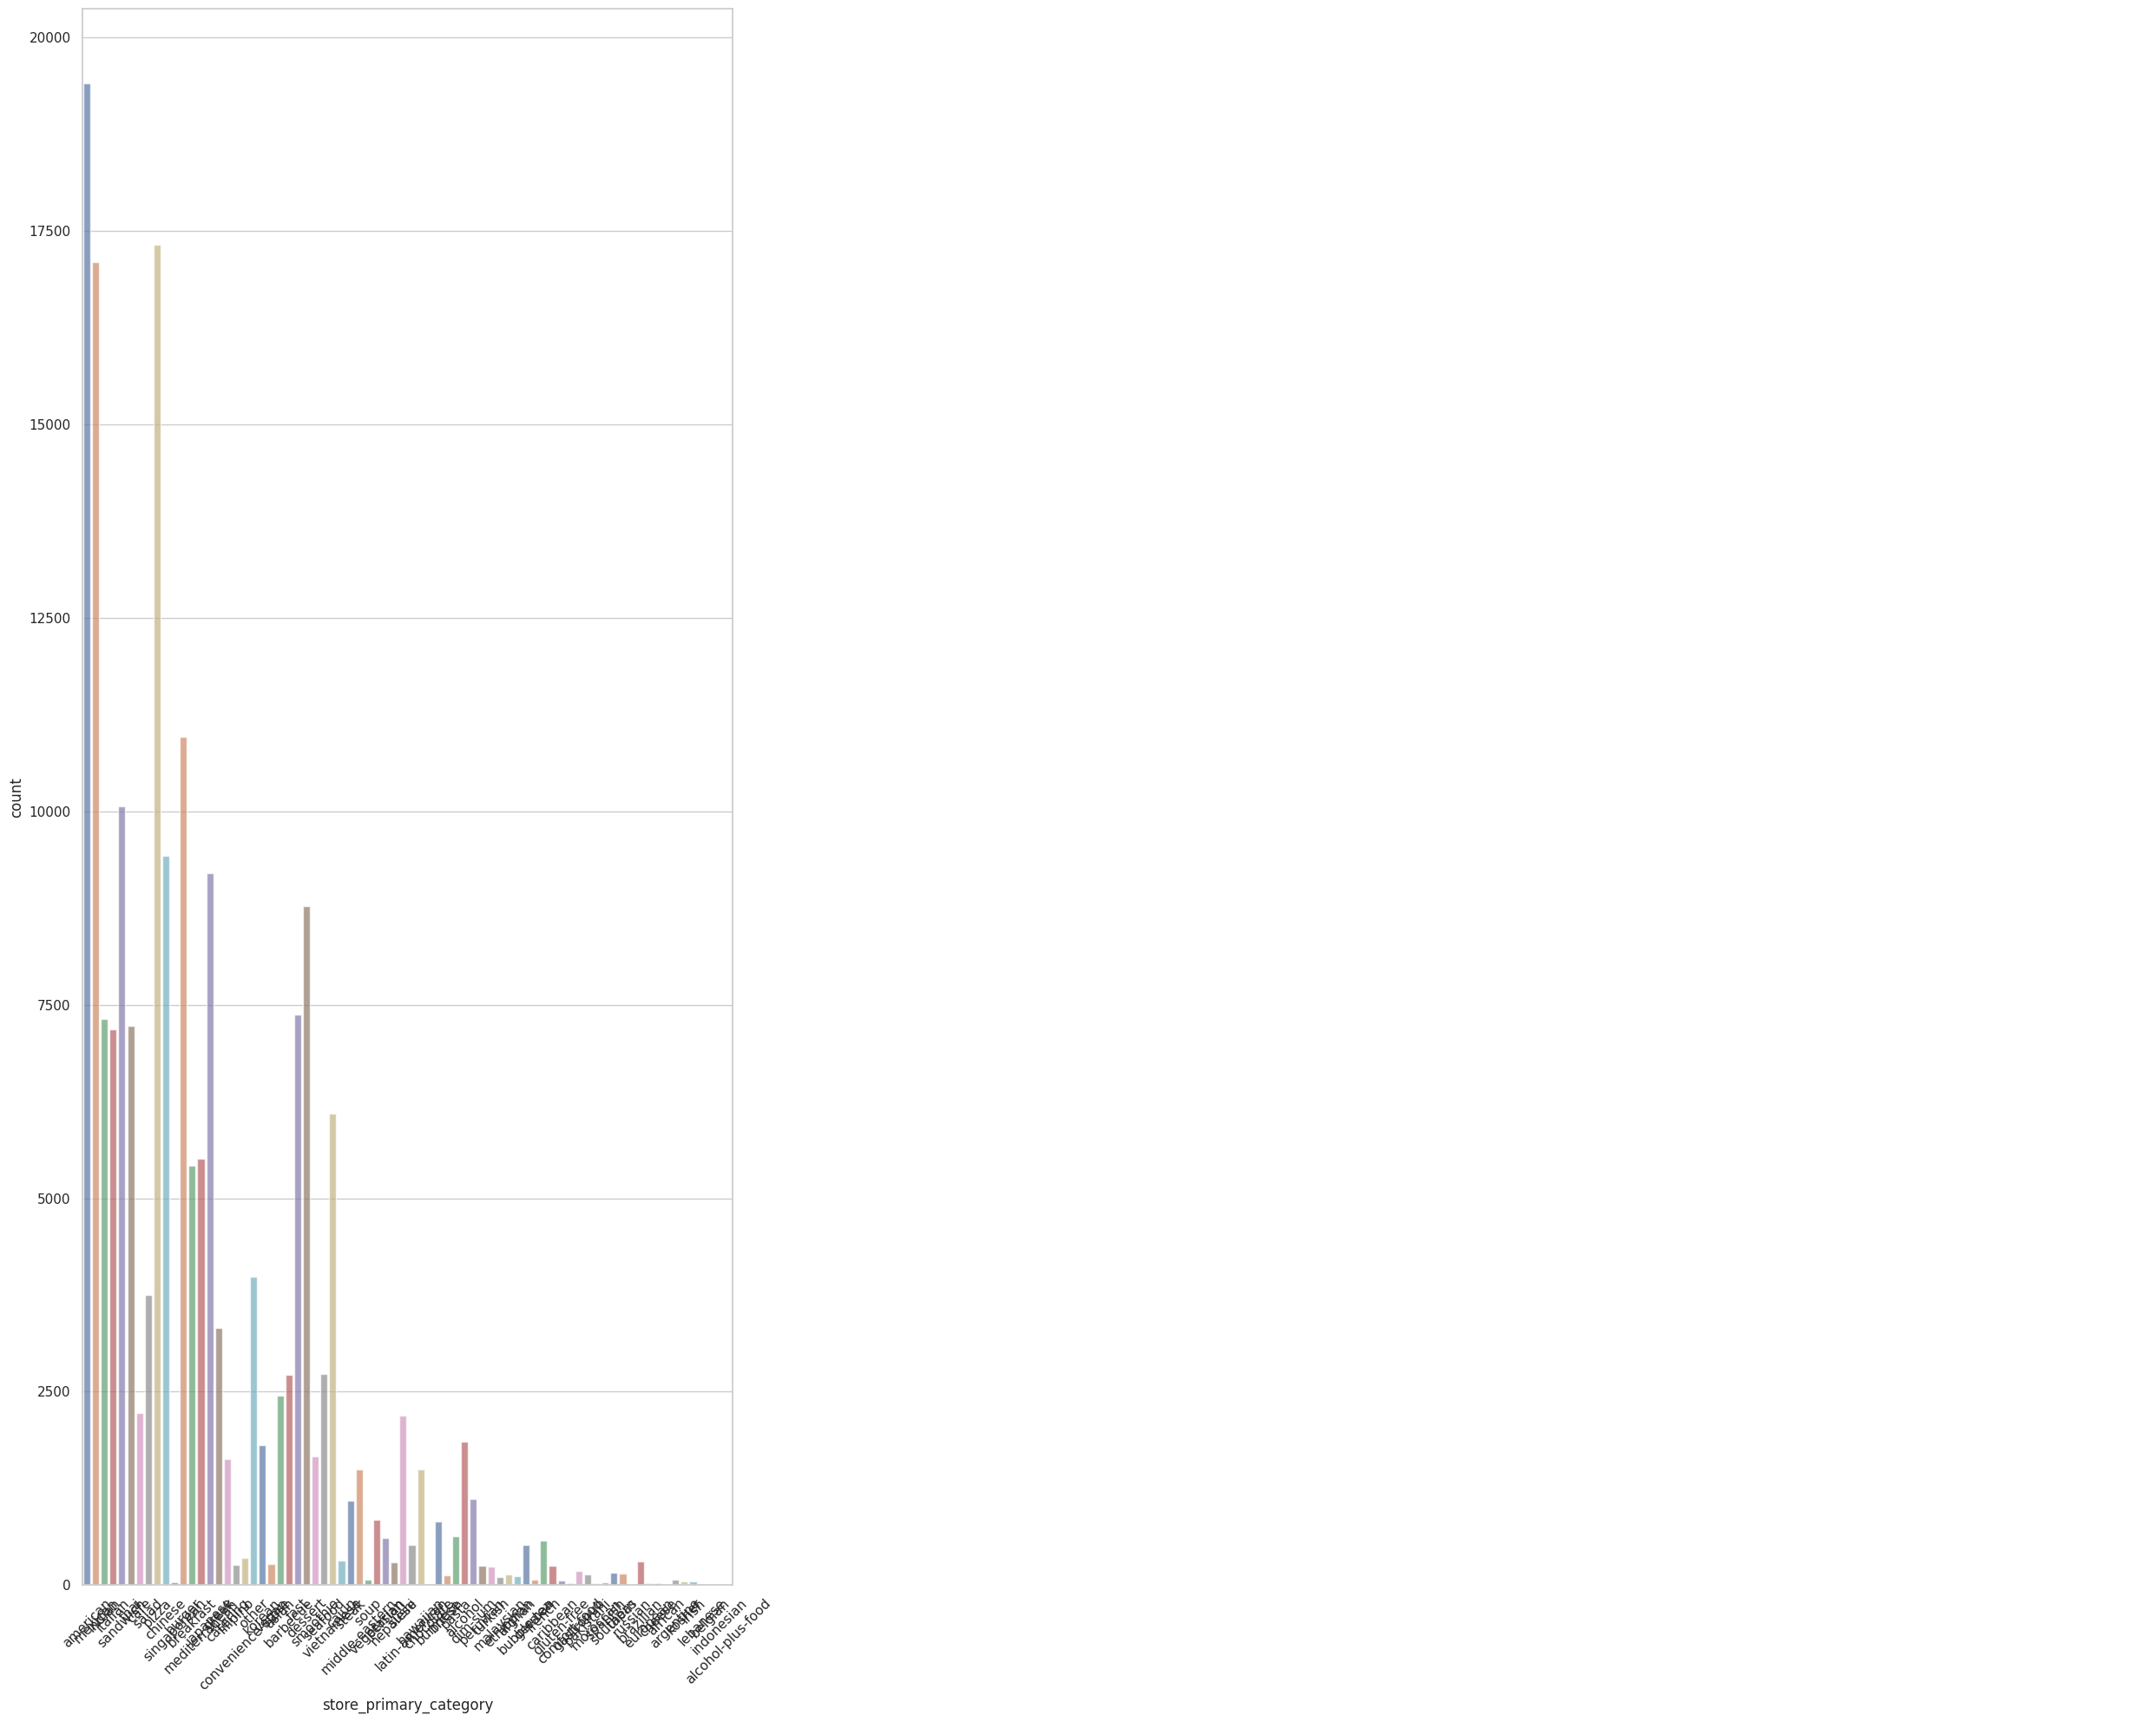

In [36]:
# Countplot for each of the categorical features in the train set
fig, axes = plt.subplots(
    nrows=round(len(df_cat_categ.columns) / 3),
    ncols=3,
    figsize=(25, 20)
)

for i, ax in enumerate(axes.flatten()):  # Iterate through flattened axes array
    if i < (len(df_cat_categ.columns)-1): # -1 because we exclude SalePrice

        sns.countplot(
            x=df_cat_categ.columns[i],
            alpha=0.7,
            data=df_cat_categ,
            palette="deep",
            ax=ax
        )

        ax.tick_params(
            axis='x',
            rotation=45
        )
    else:
        ax.set_axis_off() # Hide empty subplots

fig.tight_layout()
plt.show()

In [37]:
df_categ = df_cat_categ.copy()

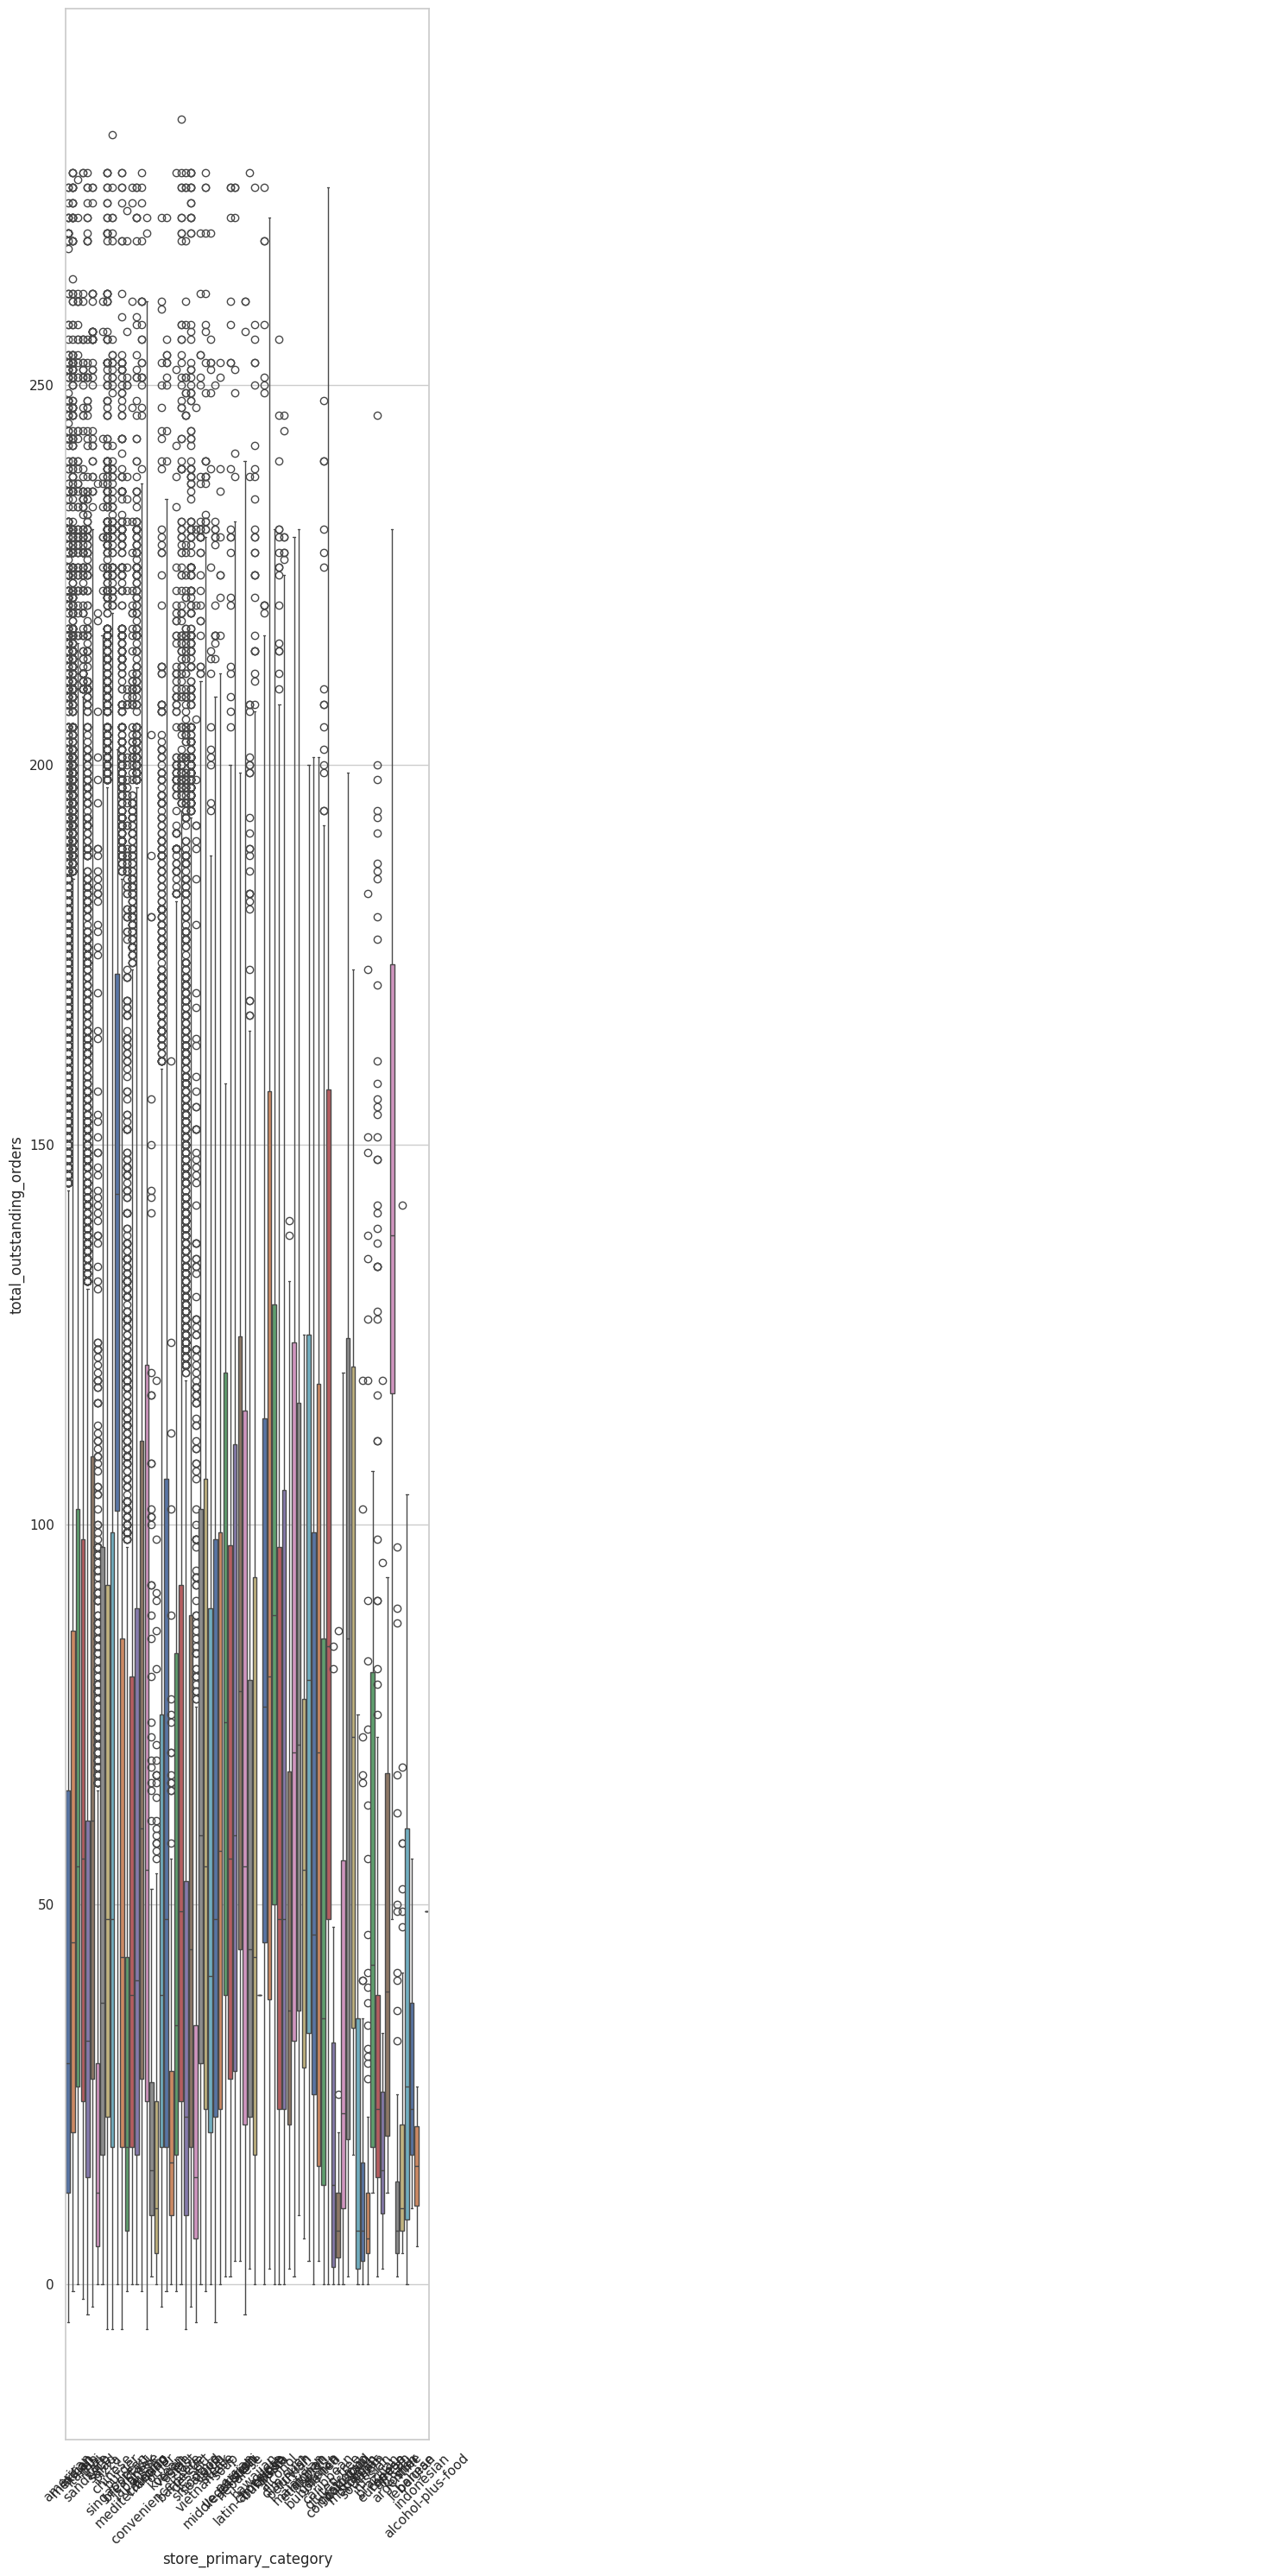

In [38]:
# With the boxplot we can see the variation of the target 'total_outstanding_orders'
# in each of the categorical features

fig, axes = plt.subplots(
    nrows=round(len(df_categ.columns)/3),
    ncols=3,
    figsize=(15, 30)
)

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(df_categ.columns) - 1:

        sns.boxplot(
            x=df_categ.columns[i],
            y="total_outstanding_orders",
            data=df_categ,
            palette="deep",
            ax=ax
        )

        ax.tick_params(
            axis='x',
            rotation=45
        )
    else:
        ax.set_axis_off() # Hide empty subplots

fig.tight_layout()
plt.show()

### 1.5.1 Missing Data of Categorical Features

Text(0, 0.5, 'Column Name\n')

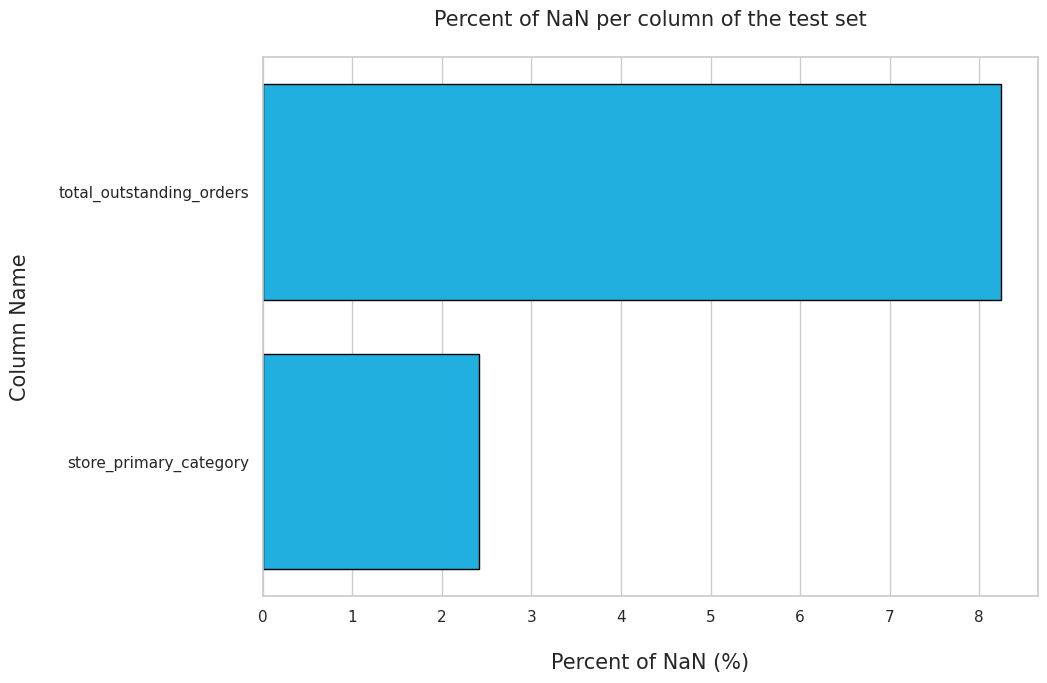

In [39]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_categ.columns[df_categ.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    nan_percentage = round(df_categ[i].isnull().sum() * 100 / len(df_categ), 2)
    percent_nan.append(nan_percentage)

tab = pd.DataFrame(
    column_name,
    columns=["Column"]
)
tab["Percent_NaN"] = percent_nan
tab.sort_values(
    by=["Percent_NaN"],
    ascending=False,
    inplace=True
)

# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")
fontsize=15

# Plot results
p = sns.barplot(
    x="Percent_NaN",
    y="Column",
    data=tab,
    edgecolor="black",
    color="deepskyblue"
)
p.set_title("Percent of NaN per column of the test set\n", fontsize=fontsize)
p.set_xlabel("\nPercent of NaN (%)", fontsize=fontsize)
p.set_ylabel("Column Name\n", fontsize=fontsize)

In [40]:
tab

,Column,Percent_NaN
1,total_outstanding_orders,8.24
0,store_primary_category,2.41


In [44]:
# Fill the NaN of each feature by the corresponding modal class
categ_fill_null = {
    "store_primary_category": df_categ["store_primary_category"].mode().iloc[0],
}

df_categ = df_categ.fillna(value=categ_fill_null)

In [45]:
df_categ.head()

,store_primary_category,total_outstanding_orders
0,american,21.00
1,mexican,2.00
2,american,0.00
3,american,2.00
4,american,9.00


## 1.6 Merge Numerical and Categorical into One Data Set

In [46]:
# Add binary features to numerical features

df_new = df_duplicate_imputed.join(df_categ)
print(f"df_new: {df_new.shape}")

df_new: (197428, 8)


In [47]:
df_new.head()

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,store_primary_category,total_outstanding_orders
0,1.00,4.00,"3,441.00",4.00,557.00,"1,239.00",american,21.00
1,2.00,1.00,"1,900.00",1.00,"1,400.00","1,400.00",mexican,2.00
2,1.00,1.00,"1,900.00",1.00,"1,900.00","1,900.00",american,0.00
3,1.00,6.00,"6,900.00",5.00,600.00,"1,800.00",american,2.00
4,1.00,3.00,"3,900.00",3.00,"1,100.00","1,600.00",american,9.00


In [49]:
df_new.isna().sum()

,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0
max_item_price,0
store_primary_category,0
total_outstanding_orders,16262


# 2. Data Preprocessing

## 2.1 Feature Engineering: Hitung `delivery_duration_minutes`

## 2.2 Drop kolom tidak relevan

## 2.3 Handle Missing Values

## 2.4 Encoding (jika perlu)

## 2.5 Feature Scaling

## 2.6 Save cleaned data untuk modeling